In [34]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization

from time import time

#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline

import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [35]:
#path = "input/AirPassengers.csv" #For local
df =  pd.read_csv("E:/Here/TS.csv") #For Kaggle
#Parse strings to datetime type
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = df.set_index(['Date'])
indexedDataset.head(5)
#instead of above to make date column as an index we can only add  pd.read_csv("E:/Here/TS.csv", index_col='Date', parse_dates=True)

,Close,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
Date,,,,,,
2014-06-01,9.800000,NaN,NaN,NaN,NaN,NaN
2014-07-01,9.957333,NaN,NaN,NaN,NaN,NaN
2014-08-01,10.085333,NaN,NaN,NaN,NaN,NaN
2014-09-01,9.835333,NaN,NaN,NaN,NaN,NaN
2014-10-01,9.714667,NaN,NaN,NaN,NaN,


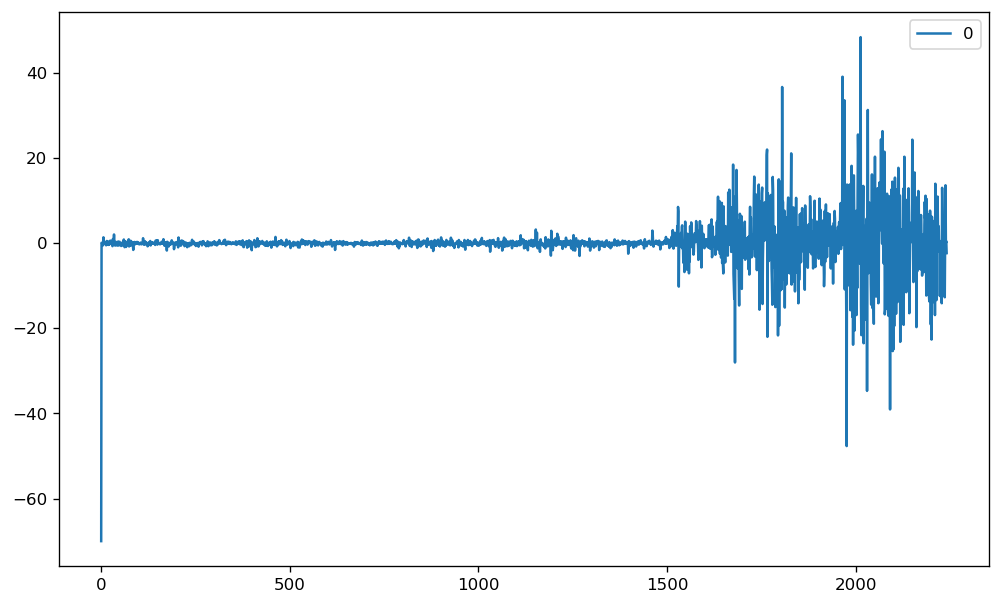

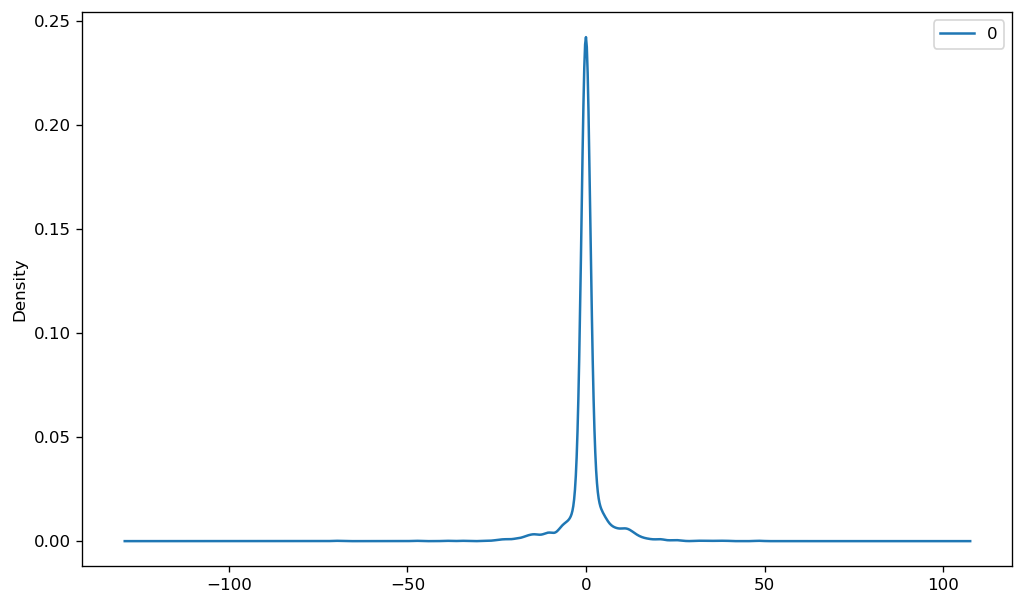

                 0
count  2242.000000
mean      0.046714
std       5.367339
min     -69.990613
25%      -0.431378
50%      -0.046429
75%       0.408072
max      48.377630


In [36]:
from statsmodels.tsa.arima.model import ARIMA
# Train/test split
df_train = df.iloc[:-24]
df_test = df.iloc[-24:]

# Train the model
model = ARIMA(df_train['Close'], order=(1,0,5))
model = model.fit()
model.summary()
#predictions = results.forecast(steps=24)
#predictions_df = pd.DataFrame(index=df_test.index, data=predictions[0])

# Plot
#plt.title('Share Market MA(1) predictions', size=20)
#plt.plot(df_train['Close'], label='Training data')
#plt.plot(df_test['Close'], color='gray', label='Testing data')
#plt.plot(predictions_df, color='orange', label='Predictions')
#plt.legend();
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [37]:
#Determine rolling statistics
rolmean = indexedDataset.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)
            #Close price

                 Close  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
Date                                                                  
2014-06-01         NaN         NaN         NaN         NaN         NaN
2014-07-01         NaN         NaN         NaN         NaN         NaN
2014-08-01         NaN         NaN         NaN         NaN         NaN
2014-09-01         NaN         NaN         NaN         NaN         NaN
2014-10-01         NaN         NaN         NaN         NaN         NaN
...                ...         ...         ...         ...         ...
2022-12-28  140.751667         NaN         NaN         NaN         NaN
2022-12-29  136.918333         NaN         NaN         NaN         NaN
2022-12-30  133.770833         NaN         NaN         NaN         NaN
2023-03-01  129.712500         NaN         NaN         NaN         NaN
2023-04-01  126.043333         NaN         NaN         NaN         NaN

[2266 rows x 5 columns]                 Close  Unnamed: 2  Unnamed: 3  Unnam

In [38]:
#Perform Augmented Dickey–Fuller test:


#def ad_test(dataset):
 #   datatest = adfuller(dataset, autolag = 'AIC')

  #  print("1. Test Statistics : ",datatest[0])
   # print("2. P-Value : ",datatest[1])
    #print("3. No of Lags : ",datatest[2])
    #print("4. No of Obseravation used : ",datatest[3])
    #print("5. Critical Value : ")
    #for key, val in datatest[4].items():
     #   print("\t",key,":", val)

In [39]:
#print('Results of Dickey Fuller Test:' )
#ad_test(data['Close'])

In [40]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -1.358035
p-value                           0.602221
#Lags Used                       27.000000
Number of Observations Used    2238.000000
Critical Value (1%)              -3.433275
Critical Value (5%)              -2.862832
Critical Value (10%)             -2.567458
dtype: float64


In [41]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable log method

In [42]:
#The below transformation is required to make series stationary
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

NameError: name 'indexedDataset_logScale' is not defined

In [43]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

NameError: name 'indexedDataset_logScale' is not defined

In [44]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [30]:
test_stationarity(datasetLogScaleMinusMovingAverage)

NameError: name 'datasetLogScaleMinusMovingAverage' is not defined

In [31]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

NameError: name 'indexedDataset_logScale' is not defined

In [21]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [22]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            


NameError: name 'datasetLogDiffShifting' is not defined

In [23]:
indexedDataset

,Close,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
Date,,,,,,
2014-06-01,9.800000,NaN,NaN,NaN,NaN,NaN
2014-07-01,9.957333,NaN,NaN,NaN,NaN,NaN
2014-08-01,10.085333,NaN,NaN,NaN,NaN,NaN
2014-09-01,9.835333,NaN,NaN,NaN,NaN,NaN
2014-10-01,9.714667,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...
2022-12-28,112.709999,NaN,NaN,NaN,NaN,NaN
2022-12-29,121.820000,NaN,NaN,NaN,NaN,NaN
2022-12-30,123.180000,NaN,NaN,NaN,NaN,NaN


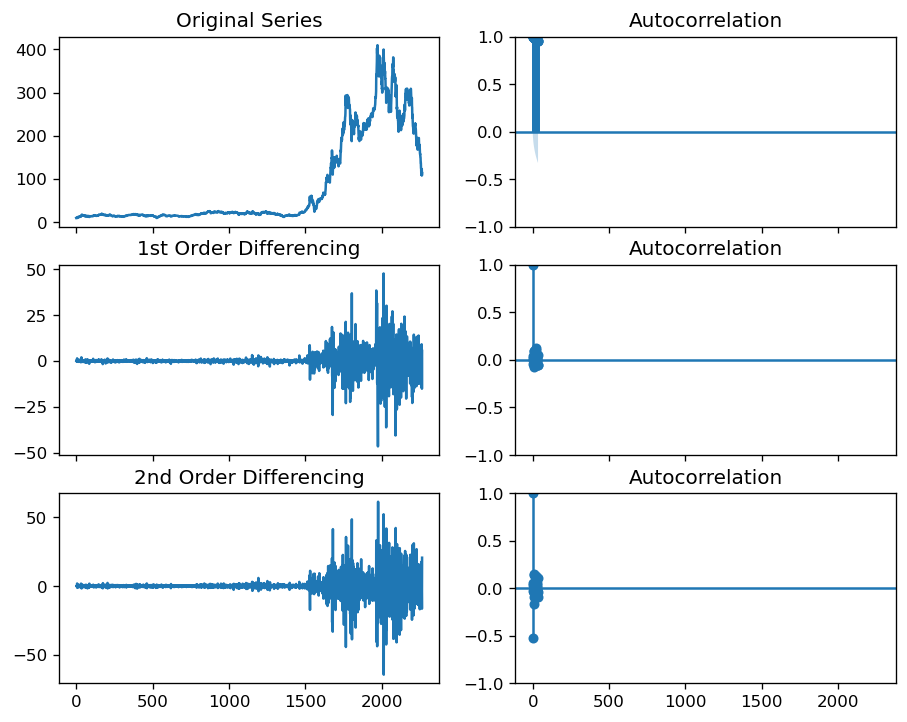

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Close); axes[0, 0].set_title('Original Series')
plot_acf(df.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Close.diff().diff().dropna(), ax=axes[2, 1])
plt.show()
